In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
import os

from git_save import git_save
from pandas import DataFrame

Error: Command '['git', 'add', '.']' returned non-zero exit status 128.


In [11]:
address=r'C:\Users\16479\Downloads\mtcars.csv'
df = pd.read_csv(address)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [12]:
#check for missing values
#normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace("_","")

print(df.isnull().sum())
print(df.describe())


unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64
             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  

In [13]:
df.columns

Index(['unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

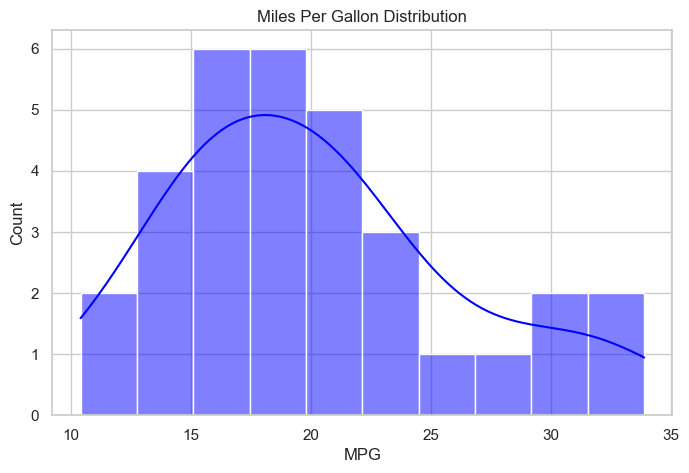

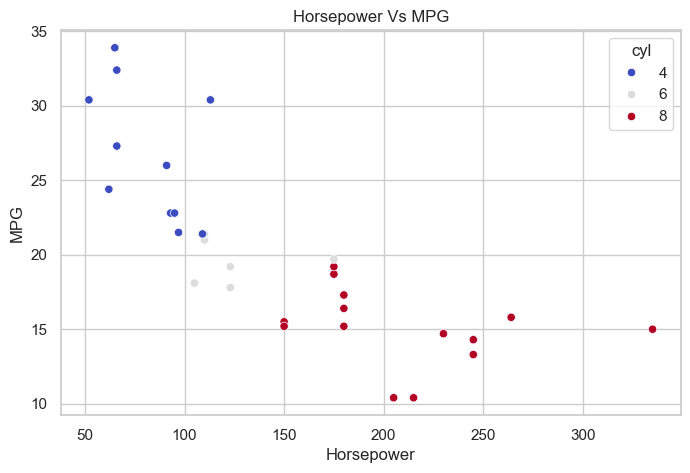

Text(0, 0.5, 'MPG')

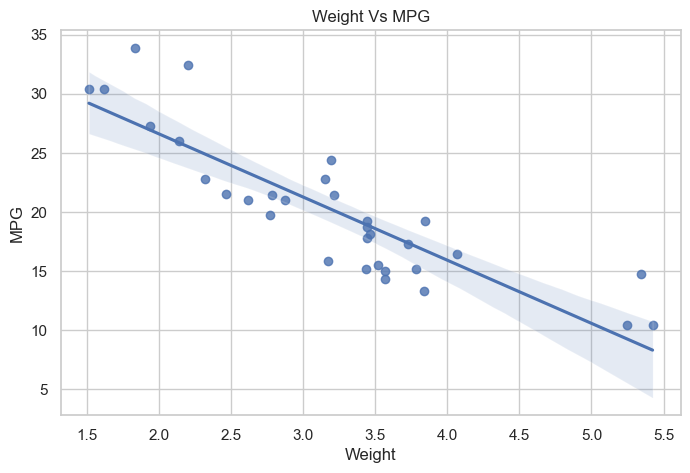

In [14]:
#analyzing MPG(fuel efficiency),Horsepower,Weight
#set Style
sns.set_theme(style = "whitegrid")

#MPG Distribution
plt.figure(figsize = (8,5))
sns.histplot(df["mpg"],bins = 10, kde = True, color="blue")
plt.title("Miles Per Gallon Distribution")
plt.xlabel("MPG")
#plt.show()

#Relation between Horsepower and MPG
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["hp"],y=df["mpg"],hue=df["cyl"],palette = "coolwarm")
plt.title("Horsepower Vs MPG")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

#weight Vs MPG
plt.figure(figsize = (8,5))
sns.regplot(x="wt",y="mpg",data=df)
plt.title("Weight Vs MPG")
plt.xlabel("Weight")
plt.ylabel("MPG")


In [18]:
#loading data into s3 buket
#AWS S3 configuration
AWS_ACCESS_KEY =""
AWS_SECRET_KEY =""
AWS_BUCKET = "carperformanceanalysis"

#Save process dataset
processed_file = "processed_mtcars.csv"
df.to_csv(processed_file,index=False)

#initialize s3 client
s3 = boto3.client(
    "s3",
    aws_access_key_id = AWS_ACCESS_KEY,
    aws_secret_access_key = AWS_SECRET_KEY
)
#upload file
s3.upload_file(processed_file,AWS_BUCKET,processed_file)
print(f"{processed_file} uploaded to {AWS_BUCKET} successfully")

processed_mtcars.csv uploaded to carperformanceanalysis successfully
